=====================================================================================<br>
# MILESTONES 1
Nama    : Hafidz Abdillah Masruri<br>
Batch   : HCK-018<br>

Notebook ini bertujuan untuk menganalisa data-data yang berasal dari fashion_retail_sales yang berisi invoice dari penjualan pakaian<br>
=====================================================================================<br>

- [DATASET](https://www.kaggle.com/datasets/fekihmea/fashion-retail-sales/data)
- [TABLEAU](https://public.tableau.com/views/MLS_17201022428800/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)



# Identifikasi Masalah

## Latar Belakang
Dalam memulai bisnis pakaian dengan jarak waktu 11 bulan terdapat lika liku permasalahan seperti masalah pada tingkat kepuasan pelanggan terhadap barang yang dijual, sehingga perlu adanya analisa untuk mengetahui apa yang menyebabkan kendala dalam kurangnya kepuasan pelanggan

## SMART:
-(S):Meningkatkan kepuasan pelanggan<br>
-(M):Rating kepuasan naik sebesar 15%<br>
-(A):Dapat dilakukan dengan mengurangi harga yang masih mendapat rating kurang<br>
-(R):Dengan meningkatkan rating yang kurang atau menurunkan harga bisa membuat pelanggan makin terpuaskan<br>
-(T):Dapat dilakukan dalam kurung waktu 3 bulan<br>

## Problem Statement:
Toko ingin meningkatkan 15% dari kepuasan pelanggan dengan menurunkan harga dengan rating kurang dalam kurun waktu 3 bulan



## Problem Breakdown:<br>
- Barang apa saja yang terjual paling banyak ?
- Berapa persentase pembayaran cash/cc pada toko tersebut?
- Item mana yang mendapatkan pendapatan terbanyak?
- Pada bulan apa penjualan mencapai tingkat tertinggi?
- [Deskriptif] Berapa ratarata review pada toko tersebut?
- [Inferensial] Apakah rata-rata review rating dengan metode cash sama besar dengan rata-rata review rating credit card?

# Data Loading

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Import library apa saja yang dibutuhkan dalam pengerjaan

In [2]:
df=pd.read_csv("Fashion_Retail_Sales.csv")
df

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,NaN,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


Membaca data set kedalam projek dan disimpan pada variable df

# Data Exploration

In [3]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


Melihat deskripisi pada data dengan .info(), didapat data memiliki 6 kolom dan 3400 rows, data tersebut harus diclean karena ada beberapa kolom yang tidak ada isinya, beberapa type kolom juga harus diganti untuk menyesuaikan pengerjaan

In [4]:
df1.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


Untuk melihat 5 teratas pada data, agar kita dapat mengetahui gambaran data kita

In [5]:
df1.tail()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,NaN,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash
3399,4001,Backpack,115.0,2023-03-22,1.4,Cash


Untuk melihat 5 terbawah pada data, agar kita dapat mengetahui gambaran data kita

In [6]:
df1.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

Pada data terbaca bahwa terdapat 650 kekosongan data pada isi dari kolom Purchase Amount (USD), dan 324 kekosongan data pada isi review rating maka harus kita drop data kekosngan tersebut

# Data Cleaning

In [7]:
df1.duplicated().sum()

0

.duplicated().sum() berfungsi untuk menghitung ada berapa data yang terduplikat

In [8]:
df1=df1.dropna()
df1.info()
df1=df1.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2487 entries, 1 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  2487 non-null   int64  
 1   Item Purchased         2487 non-null   object 
 2   Purchase Amount (USD)  2487 non-null   float64
 3   Date Purchase          2487 non-null   object 
 4   Review Rating          2487 non-null   float64
 5   Payment Method         2487 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 136.0+ KB


.dropna() Bermaksud untuk menghapus data yang tidak ada nilainya atau kekosongan data, lalu setelah kita hapus kita reset index supaya penomeran index mengikuti row baru, setelah kita cek .info() ternyata type data kolom 'date' dan 'Purchase Amount (USD)' masih belum sesuai

In [9]:
df1['Purchase Amount (USD)']=df1['Purchase Amount (USD)'].astype(int)
df1['Date Purchase'] = pd.to_datetime(df1['Date Purchase'])
df1.rename(columns={'Customer Reference ID': 'ID'}, inplace=True)
df1.rename(columns={'Item Purchased': 'Item'}, inplace=True)
df1.rename(columns={'Purchase Amount (USD)': 'Harga ($)'}, inplace=True)
df1.rename(columns={'Date Purchase': 'Date'}, inplace=True)
df1.rename(columns={'Review Rating': 'Rating'}, inplace=True)
df1.rename(columns={'Payment Method': 'Payment'}, inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2487 entries, 0 to 2486
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         2487 non-null   int64         
 1   Item       2487 non-null   object        
 2   Harga ($)  2487 non-null   int32         
 3   Date       2487 non-null   datetime64[ns]
 4   Rating     2487 non-null   float64       
 5   Payment    2487 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 107.0+ KB


Perubahan nama kolom serta type data agar mempermudah saat melakukan analysis:<br>
- Pada kolom 'Customer Reference ID' kita ubah menjadi 'ID'
- Pada kolom 'Item Purchased' kita ubah menjadi 'Item'
- Pada kolom 'Purchase Amount (USD)' kita ubah menjadi 'Harga ($)' serta perubahan pada typedata menjadi integer(agar tidak ada nilai desimal)
- Pada kolom 'Date Purchase' kita ubah menjadi 'Date' serta perubahan pada typedata menjadi datetime(64) agar bisa memanggil tanggal
- Pada kolom 'Review Rating' kita ubah menjadi 'Rating'
- Pada kolom 'Payment Method' kita ubah menjadi 'Payment'

In [10]:
df1

,ID,Item,Harga ($),Date,Rating,Payment
0,4115,Tunic,2456,2023-07-11,2.0,Credit Card
1,4019,Tank Top,2102,2023-03-23,4.1,Cash
2,4097,Leggings,3126,2023-03-15,3.2,Cash
3,3997,Wallet,3003,2022-11-27,4.7,Cash
4,4080,Onesie,2914,2022-12-11,4.5,Credit Card
...,...,...,...,...,...,...
2482,4040,Tank Top,113,2023-01-20,1.2,Credit Card
2483,4118,Shorts,37,2023-07-09,2.7,Cash
2484,4056,Slippers,176,2023-03-16,2.5,Cash
2485,4042,Sandals,128,2023-01-01,1.8,Cash


Hasil dari perubahan nama kolom serta type data

In [11]:
penjualan_okt = df1[(df1['Date'].dt.year == 2023) & (df1['Date'].dt.month == 10)]
penjualan_okt

,ID,Item,Harga ($),Date,Rating,Payment
626,4005,Vest,122,2023-10-01,2.0,Cash
1084,4108,Camisole,46,2023-10-01,1.8,Cash
1350,4029,Pajamas,151,2023-10-01,4.0,Cash
1442,4110,Kimono,46,2023-10-01,4.6,Cash
2174,4000,Wallet,58,2023-10-01,2.6,Credit Card


Dikarenakan penjualan pada bulan oktober hanya pada tanggal 1 dan berjumlah 5 maka data tidak valid dan akan kita drop karena tidak bisa merepresentasikan bulan oktober 2023

In [12]:
df1 = df1.loc[~((df1['Date'].dt.year == 2023) & (df1['Date'].dt.month == 10))]

pada df1 kita menghapus seluruh row pada bagian date bila ditemukan bulan oktober (10) dan tahun 2023

In [13]:
df1=df1.reset_index(drop=True)
df1

,ID,Item,Harga ($),Date,Rating,Payment
0,4115,Tunic,2456,2023-07-11,2.0,Credit Card
1,4019,Tank Top,2102,2023-03-23,4.1,Cash
2,4097,Leggings,3126,2023-03-15,3.2,Cash
3,3997,Wallet,3003,2022-11-27,4.7,Cash
4,4080,Onesie,2914,2022-12-11,4.5,Credit Card
...,...,...,...,...,...,...
2477,4040,Tank Top,113,2023-01-20,1.2,Credit Card
2478,4118,Shorts,37,2023-07-09,2.7,Cash
2479,4056,Slippers,176,2023-03-16,2.5,Cash
2480,4042,Sandals,128,2023-01-01,1.8,Cash


Hasil data setelah selesai cleaning didapat 6 kolom dan 2482 total rows

# Analisis dan perhitungan

## Problem Breakdown

### 1. Barang apa saja yang terjual paling banyak ?

In [14]:
total=df1['Item'].count()
print("Jumlah Item:",df1['Item'].count())


Jumlah Item: 2482


Dengan count kita bisa mendapatkan jumlah item yang terjual adalah sebesar 2482 

In [15]:
countitem = (df1['Item']).value_counts()
jumlah = countitem.reset_index()
jumlah.columns = ['Item', 'Terjual']
display(jumlah.head(),jumlah.tail())

,Item,Terjual
0,Shorts,69
1,Belt,65
2,Skirt,63
3,Tank Top,60
4,Pants,59


,Item,Terjual
45,Trousers,39
46,Flip-Flops,37
47,Sun Hat,37
48,Romper,36
49,Bowtie,36


Kita membuat dataframe baru bernama jumlah yang berisi 2 kolom (item dan jumlah terjualnya), pada display atas adalah:<br>Top 5 tertinggi, dan pada display bawahnya Top 5 terendah

In [16]:
fig = px.bar(jumlah, y='Terjual', x='Item', text_auto='.2s',
            title="Item berdasarkan Jumlah terjual")
fig.update_layout(title_x = 0.5)
fig.update_yaxes(title_text="Terjual Total: " + str(total))
fig.update_xaxes(title_text="Item (50)")
fig.show()

Berikut bar chart yang kita dapatkan berdasarkan item dengan jumlah terjual didapat<br>
Total seluruh item terjual  : 2482pcs<br>
5 terbanyak : Shorts(69), Belt(65), Skirt(63), Tank Top(60), Pants(59)<br>
5 terendah  : Bowtie(36), Romper(36), Sun Hat(37), Flip-Flops(37), Trousers(39)

### 2. Berapa persentase pembayaran cash/cc pada toko tersebut?


In [17]:
pay = (df1['Payment']).value_counts()
payment = pay.reset_index()
payment.columns = ['Metode', 'Jumlah']
payment

,Metode,Jumlah
0,Credit Card,1302
1,Cash,1180


Dengan adanya 2 tipe transaksi kita dapat mengetahui berapa jumlah transaksi dengan cash dan juga credit card didapat:<br>
Credit Card : 1302<br>
Cash    : 1180

In [18]:
fig = px.pie(payment, values='Jumlah', names='Metode')
fig.update_layout(title_text=f'Persentase pilihan payment sebanyak {total}',
                  title_x=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Pada pie-chart terlihat bahwasanya persentase pilihan payment:<br>
Cash    = 1180 = 47,5%<br>
Credit Card = 1302 = 52,5%<br>
perbedaannya adalah kisaran 5% lebih banyak pengguna credit card 

### 3. Item mana yang mendapatkan pendapatan terbanyak?


In [19]:
income=df1["Harga ($)"].sum()
print(f"Pendapatan Total: $",income)

Pendapatan Total: $ 371657


Penggunaan .sum untuk menjumlahkan seluruh pendapatan dari semua item, dalam toko tersebut mendapatkan total pendapatan sebesar $371.657

In [20]:
pendapatan = df1.groupby('Item').agg({'Harga ($)': 'sum'}).reset_index()
pendapatan.sort_values(by=['Harga ($)'], ascending=False, inplace=True, ignore_index=True)
display(pendapatan.head(), pendapatan.tail())

,Item,Harga ($)
0,Tunic,16980
1,Jeans,12475
2,Shorts,12246
3,Gloves,11793
4,Boots,11174


,Item,Harga ($)
45,Tie,4245
46,Dress,3989
47,Socks,3965
48,Romper,3916
49,Sun Hat,3580


Pada display diatas adalah kita membuat dataframe bernama 'pendapatan' yang berisi 2 kolom (item dan Harga ($)) yang berisi:<br>
Top 5 pendapatan tertinggi, dan pada display bawahnya Top 5 pendapatan terendah

In [21]:
fig = px.bar(pendapatan, y='Harga ($)', x='Item', text_auto='.2s',
            title="Pendapatan tiap item")
fig.update_layout(title_x = 0.5)
fig.update_yaxes( title_text="Pendapatan Total: " + str(income))
fig.update_xaxes(title_text="Item (50)")
fig.show()

Berikut bar chart yang kita dapatkan berdasarkan item dengan pendapatan didapat<br>
Total seluruh item terjual  : $371.657<br>
5 terbanyak : Tunic($16.98k), Jeans(12.475k), Shorts($12.246), Gloves($11.793k), Boots($11.174)<br>
5 terendah  : Sun Hat($3580), Romper($3916), Socks($3965), Dress($3989), Tie($4245)

### Pada bulan apa penjualan mencapai tingkat tertinggi?

In [22]:
df1['Date'] =pd.to_datetime(df1["Date"]).dt.strftime("%Y-%m")
datex = (df1['Date']).value_counts()
datem = datex.reset_index()
datem.columns = ['Date', 'Jumlah']
datem.sort_values(by='Date', ascending=True, inplace=True)
datem


,Date,Jumlah
4,2022-10,218
9,2022-11,180
0,2022-12,232
5,2023-01,217
11,2023-02,174
7,2023-03,210
6,2023-04,213
1,2023-05,224
8,2023-06,194
2,2023-07,222


Membuat dataframe baru dengan nama datem yang berisi 2 kolom 'Date' dan 'Jumlah'<br> 
Date berisi bulan dan tahun<br>
Jumlah berisi tentang total barang yang terjual<br>
datem artinya dataframe yang berisi total penjualan perbulan

In [23]:
fig = px.line(datem, x='Date', y="Jumlah",title="Penjualan perbulan (Okt 2022-Sep 2023)")
fig.update_layout(title_x = 0.5)
fig.update_yaxes( title_text="Jumlah barang terjual")
fig.show()

Line-Chart diatas menjelaskan tentang barang keluar tiap bulan dimana dimulai pada bulan oktober 2022 - september 2023 (11 Bulan), awal barang terjual sebanyak 218pcs dan pada september 2023 barang terjual sebesar 179pcs dimana barang terjual paling banyak pada bulan desember 2022 sebesar 232pcs dan paling sedikit pada bulan Februari 2023 sebesar 174pcs

### 4. [Deskriptif] Berapa ratarata rating pada toko tersebut?


In [24]:
print("Rata-rata Rating:",df1["Rating"].mean())
print("Median Rating:",df1["Rating"].median())
print("Standar deviasi Rating:",df1["Rating"].std())
print(f"Skewness Rating: {df1['Rating'].skew()}")
print(f"Kurtosis Rating: {df1['Rating'].kurtosis()}")

Rata-rata Rating: 2.986220789685737
Median Rating: 3.0
Standar deviasi Rating: 1.1507719139723684
Skewness Rating: -0.0022106587075970026
Kurtosis Rating: -1.2054334009712302


Dengan melihat hasil median yang hampir sama dengan rata-rata kita dapat menyimpulkan bahwasanya distribusi data cenderung simetris, ditambah dengan skew yang cenderung ke 0 artinya distribusi hampir simetris, untuk nilai kurtosis sendiri lebih datar(platykurtic)

<Axes: >

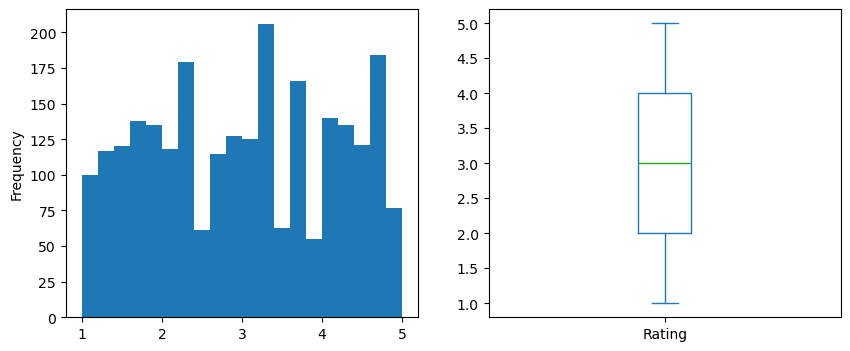

In [25]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
df1["Rating"].plot(kind='hist',bins=20,ax=ax[0])
df1["Rating"].plot(kind='box',ax=ax[1])

Berikut tampilan grafik terlihat tidak adanya outlier, distribusi data terkesan lebih datar sehingga bisa dibilang data termasuk normal

In [26]:
rating=df1["Rating"].mean()
print("Rating   :",rating)
print("Dibulatkan menjadi")
rating=f"{rating:.2f}"
print(f"Rata-rata total rating:",rating)

Rating   : 2.986220789685737
Dibulatkan menjadi
Rata-rata total rating: 2.99


Rata-rata rating seluruh barang adalah 2.99/5

In [27]:
itemsaja = df1.groupby('Item').agg({'Rating': 'mean'}).reset_index()
itemsaja.sort_values(by=['Rating'], ascending=False, inplace=True, ignore_index=True)
display(itemsaja.head(), itemsaja.tail())

,Item,Rating
0,Sun Hat,3.508108
1,Flip-Flops,3.348649
2,Skirt,3.333333
3,Jumpsuit,3.270000
4,Handbag,3.237736


,Item,Rating
45,Sunglasses,2.668519
46,Leggings,2.657143
47,Jacket,2.635556
48,Flannel Shirt,2.590196
49,Tunic,2.535294


Kita membuat dataframe baru bernama 'itemsaja' jumlah yang berisi 2 kolom (item dan rating), pada display atas adalah:<br>
Top 5 rating tertinggi, dan pada display bawahnya Top 5 rating terendah

In [28]:
fig = px.bar(itemsaja, y='Rating', x='Item', text_auto='.2s',
            title="Item berdasarkan Rating")
fig.update_layout(title_x = 0.5)
fig.update_yaxes(range=[0, 5], title_text="Rata-Rata Rating: " + str(rating))
fig.update_xaxes(title_text="Item (50)")

fig.show()

Berdasarkan data diatas total rating adalah 2,99 dengan total 50 item terdapat rating yang hampir sama besar dengan terkecil pada Tunic dengan 2,5 dan terbesar pada sun Hat 3,5

### 4. [Inferensial] Apakah rata-rata metode dengan cash sama besar dengan rata-rata credit card?

Two-Sample Independent Test<br>
H0:Rata-rata Rating antara metode pembayaran Cash dan Credit Card sama<br>
h1:Rata-rata Rating antara metode pembayaran Cash dan Credit Card sama

In [29]:
Cash = df1[df1['Payment'].str.contains('Cash')]
CC = df1[df1['Payment'].str.contains('Cash')==False]

Memisahkan metode pembayaran dengan cara diatas dimana cash sudah berisi pembayaran metode cash, dan CC berisi pembayaran metode Credit Card

In [30]:
print("Rata-rata Rating metode cash: ",Cash['Rating'].mean())

Rata-rata Rating metode cash:  2.9816101694915256


Didapat rata-rata review rating pada metode cash sebesar 2.9816101694915256

In [31]:
print("Rata-rata Rating metode Credit Card: ",CC['Rating'].mean())

Rata-rata Rating metode Credit Card:  2.990399385560676


Didapat rata-rata review rating pada metode Credit Card sebesar 2.990399385560676

In [32]:
t_stat, p_val = stats.ttest_ind(Cash['Rating'],CC['Rating'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

T-Statistic: -0.189986224834923
P-value: 0.8493354734689441


Berdasarkan hasil ujiTwo-Sample Independent Test, T-Statistic: -0.189986224834923 menunjukkan bahwa perbedaan rata-rata antara Cash dan Credit Card relatif kecil, serta nilai p-value 0.8493354734689441 lebih besar dari 0.05. Hal ini menunjukkan bahwa tidak ada cukup bukti statistik untuk menolak hipotesis nol.

# Kesimpulan

**Analisis Deskriptif**
- **Distribusi Penjualan:** Barang terjual paling banyak pada bulan Desember 2022 (232 pcs) dan paling sedikit pada bulan Februari 2023 (174 pcs).
- **Rata-rata Rating:** Rata-rata rating seluruh barang adalah 2.99/5.
  - Top rating tertinggi: Sun Hat (3.5).
  - Top rating terendah: Tunic (2.5).
- **Distribusi Rating:**
  - Distribusi data rating cenderung simetris dengan skew yang mendekati 0.
  - Nilai kurtosis menunjukkan distribusi data lebih datar (platykurtic).
  - Grafik distribusi menunjukkan tidak adanya outlier, dengan distribusi data yang termasuk normal.

**Analisis Inferensial**
- **Uji Two-Sample Independent Test:**
  - **Hipotesis Nol (H0):** Rata-rata rating antara metode pembayaran cash dan credit card sama.
  - **Hasil Uji:**
    - Rata-rata rating metode cash: 2.9816.
    - Rata-rata rating metode credit card: 2.9904.
    - T-Statistic: -0.189986224834923.
    - p-value: 0.8493354734689441 (lebih besar dari 0.05), menunjukkan tidak ada cukup bukti statistik untuk menolak hipotesis nol.
  - **Kesimpulan:** Tidak ada perbedaan signifikan antara rating review untuk metode pembayaran cash dan credit card.

### Ringkasan Kesimpulan
- **Deskriptif:** Data penjualan menunjukkan variasi bulanan dengan bulan Desember sebagai bulan penjualan tertinggi. Rata-rata rating barang adalah 2.99 dengan distribusi rating yang hampir simetris dan normal.
- **Inferensial:** Tidak ada perbedaan signifikan dalam rating review antara metode pembayaran cash dan credit card.
- **Rekomendasi:** Untuk meningkatkan kepuasan pelanggan, toko dapat mempertimbangkan untuk menurunkan harga barang dengan rating rendah atau fokus pada aspek lain selain metode pembayaran.